# Evaluating Machine Learning Algorithms - Extended Examples

## Preparations

* Download [Anaconda with Python 3.6](https://www.anaconda.com/download) to install a nearly complete Python enviroment for data science projects
* Install [Keras: The Python Deep Learning Library](https://keras.io/) and other missing packages with the following command: ```conda install keras```
* Start your local Jupyter instance with ```jupyter notebook```

If you cannot see line numbers press ```Shift+L```to switch them on or check the ```View``` menu.

In [9]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# the import statements load differnt Python packages that we need for the tutorial
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
# packages for scientif computing and visualization
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
# configuration of the notebook
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook")

# machine learning library imports
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

## Setting Up the Experiment

In this example, we will rely on the [NIST MNIST data set](http://yann.lecun.com/exdb/mnist/ ), a data set for the recognition of hand-written digits. MNIST is a data set that has been used by the [NIST](https://www.nist.gov/) such as the discussed [TREC campaign](https://trec.nist.gov/).

The following script will display some sample digits to give an example of the contents of the data set.


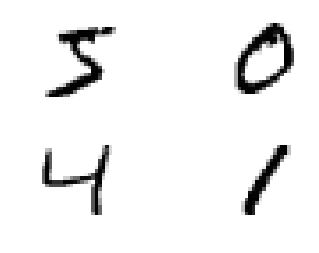

In [70]:
# load (download if needed) the MNIST dataset of handwritten numbers
# we will get a training and test set consisting of bitmaps 
# in the X_* arrays and the associated labels in the y_* arrays
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# plot 4 images as gray scale images using subplots without axis labels
plt.subplot(221)
plt.axis('off')
# -1 inverts the image because of aesthetical reasons
plt.imshow(X_train[0]*-1, cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.axis('off')
plt.imshow(X_train[1]*-1, cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.axis('off')
plt.imshow(X_train[2]*-1, cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.axis('off')
plt.imshow(X_train[3]*-1, cmap=plt.get_cmap('gray'))

# show the plot
#plt.savefig("test.pdf",format="pdf")
plt.show()

Next, we define out machine learning model with different layers. Roughly speaking, the function baseline_model() defines how the neural network looks like. For more details, see the [documentation](https://keras.io/getting-started/sequential-model-guide/).

In [72]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model, use logarithmic loss for evaluation
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model


# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# flatten 28*28 images from the MNIST data set to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


# build the model
model = baseline_model()
# fit the model, i.e., start the actual learning
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
# print the error rate of the algorithm
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 36s - loss: 0.2797 - acc: 0.9205 - val_loss: 0.1411 - val_acc: 0.9576
Epoch 2/10
 - 37s - loss: 0.1116 - acc: 0.9675 - val_loss: 0.0922 - val_acc: 0.9713
Epoch 3/10
 - 37s - loss: 0.0717 - acc: 0.9798 - val_loss: 0.0790 - val_acc: 0.9764
Epoch 4/10
 - 44s - loss: 0.0502 - acc: 0.9861 - val_loss: 0.0749 - val_acc: 0.9770
Epoch 5/10
 - 43s - loss: 0.0369 - acc: 0.9895 - val_loss: 0.0665 - val_acc: 0.9791
Epoch 6/10
 - 45s - loss: 0.0266 - acc: 0.9930 - val_loss: 0.0627 - val_acc: 0.9802
Epoch 7/10
 - 37s - loss: 0.0207 - acc: 0.9946 - val_loss: 0.0632 - val_acc: 0.9807
Epoch 8/10
 - 36s - loss: 0.0139 - acc: 0.9971 - val_loss: 0.0621 - val_acc: 0.9807
Epoch 9/10
 - 36s - loss: 0.0105 - acc: 0.9979 - val_loss: 0.0585 - val_acc: 0.9817
Epoch 10/10
 - 37s - loss: 0.0078 - acc: 0.9986 - val_loss: 0.0577 - val_acc: 0.9819
Baseline Error: 1.81%


## Overfitting

In the next cell, we will use very few training data up to the same amount of training data used before to illustrate the overfitting phenomenon.

In [4]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# the steps indicate the size of the training sample
steps=[18,100,1000,5000,10000,20000,30000,40000,50000]
# this dict (basically a hashmap) holds the error rate for each iteration
errorPerStep=dict()

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

for step in steps:
    # load data
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # limit the training data size to the current step, the : means "from 0 to step"
    X_train=X_train[0:step]
    y_train=y_train[0:step]

    # flatten 28*28 images to a 784 vector for each image
    num_pixels = X_train.shape[1] * X_train.shape[2]
    X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

    # normalize inputs from 0-255 to 0-1
    X_train = X_train / 255
    X_test = X_test / 255

    # one hot encode outputs
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    num_classes = y_test.shape[1]



    # build the model
    model = baseline_model()
    # Fit the model
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Baseline Error: %.2f%%" % (100-scores[1]*100))
    errorPerStep[step]=(100-scores[1]*100)

Train on 18 samples, validate on 10000 samples
Epoch 1/10
 - 3s - loss: 2.2611 - acc: 0.1111 - val_loss: 2.1296 - val_acc: 0.2652
Epoch 2/10
 - 2s - loss: 1.5880 - acc: 0.7778 - val_loss: 1.9998 - val_acc: 0.3323
Epoch 3/10
 - 3s - loss: 1.0800 - acc: 0.8889 - val_loss: 1.8929 - val_acc: 0.3801
Epoch 4/10
 - 3s - loss: 0.7361 - acc: 1.0000 - val_loss: 1.7894 - val_acc: 0.4209
Epoch 5/10
 - 3s - loss: 0.4807 - acc: 1.0000 - val_loss: 1.6933 - val_acc: 0.4593
Epoch 6/10
 - 3s - loss: 0.2989 - acc: 1.0000 - val_loss: 1.6176 - val_acc: 0.4888
Epoch 7/10
 - 3s - loss: 0.1881 - acc: 1.0000 - val_loss: 1.5588 - val_acc: 0.5063
Epoch 8/10
 - 3s - loss: 0.1196 - acc: 1.0000 - val_loss: 1.5155 - val_acc: 0.5208
Epoch 9/10
 - 3s - loss: 0.0769 - acc: 1.0000 - val_loss: 1.4869 - val_acc: 0.5298
Epoch 10/10
 - 3s - loss: 0.0506 - acc: 1.0000 - val_loss: 1.4705 - val_acc: 0.5345
Baseline Error: 46.55%
Train on 100 samples, validate on 10000 samples
Epoch 1/10
 - 3s - loss: 2.4231 - acc: 0.0500 - val

Next, we will illustrate our results.

{18: 46.550000000000004, 100: 33.209999999999994, 1000: 11.579999999999998, 5000: 6.109999999999999, 10000: 4.269999999999996, 20000: 2.739999999999995, 30000: 2.1299999999999955, 40000: 2.219999999999999, 50000: 1.9599999999999937}


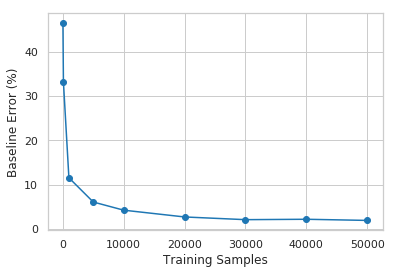

In [159]:
print(errorPerStep)
x=[]
y=[]
for e in errorPerStep:
    x.append(e)
    y.append(errorPerStep[e])

plt.xlabel("Training Samples")
plt.ylabel("Baseline Error (%)")
plt.plot(x,y,'o-')
plt.savefig("test.pdf",format="pdf")

The graph indicates clearly that the baseline error decreases with the increase of training data. In other words, the overfitting effect is limited in relation to the amount of data the learning algorithm has seen.

To end the example, we will check how well the model can predict new input.

The model predicts: 2 for the following image:


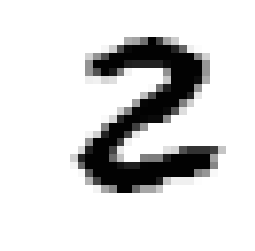

In [160]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# choose a random sample as our test image
test_im = X_train[25]
# display the image
plt.imshow(test_im.reshape(28,28)*-1, cmap=plt.get_cmap('gray'), interpolation='none')
plt.axis('off')

num_pixels = X_train.shape[1] * X_train.shape[2]
# as we are dealing with only one image, we have to restrict the array to a 1D * 784
test_im = test_im.reshape(1, num_pixels).astype('float32')

# let the model predict the image
r=model.predict(test_im)

itemindex = np.where(r[0]==1)
print("The model predicts: %i for the following image:"%itemindex[0])

## Accuracy and Error Rate

The next cell illustrates how accuracy changes with respect to different distributions between two classes if the model always predict that an element belongs to class A.
$$
Accuracy=\frac{|tp+tn|}{|tp|+|tn|+|fp|+|fn|}\equiv\frac{|\mbox{correct predictions}|}{|\mbox{predictions}|}
$$

Accuracy: 0.90
Accuracy: 0.55
Accuracy: 0.70
Accuracy: 0.50
Accuracy: 0.20


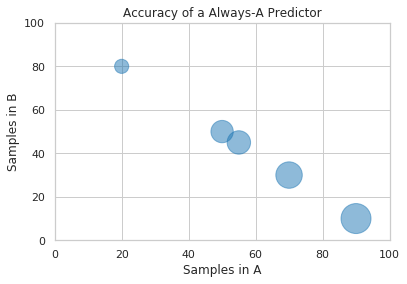

In [158]:
# arrays for plotting
x=[] # samples in A
y=[] # samples in B
accuracies=[] # calculated accuracies for each distribution

# distributions between class A and B, first entry means 90% in A, 10% in B
distributions=[[90,10],[55,45],[70,30],[50,50],[20,80]]

for distribution in distributions:
    x.append(distribution[0])
    y.append(distribution[1])

    samplesA=np.ones((1,distribution[0])) # membership of class A is encoded as 1
    samplesB=np.zeros((1,distribution[1])) # membership of class B is encoded as 0
    # combine both arrays
    reality=np.concatenate((samplesA,samplesB),axis=None)
    # as said above, our model always associates the elements with class A (encoded by 1)
    prediction=np.ones((1,100))

    tpCount=0

    # count the true positives
    for (i,val) in enumerate(prediction[0]):
        if not reality[i]==val:
            pass
        else:
            tpCount+=1
            
    # calculate the accuracy and add the to the accuracies array for later visualization
    acc=float(tpCount+tnCount)/100.0
    accuracies.append(acc*1000) # the multiplication by 1000 is done for visualization purposes only
    print("Accuracy: %.2f"%(acc))

# plot the results as a bubble chart
plt.xlim(0,100)
plt.ylim(0,100)
plt.xlabel("Samples in A")
plt.ylabel("Samples in B")
plt.title("Accuracy of a Always-A Predictor")
plt.scatter(x, y, s=accuracies*100000,alpha=0.5)
#plt.savefig("test.png",format="png")
plt.show()

## Logarithmic Loss
The 
$Logarithmic ~Loss=\frac{-1}{N}\sum_{i=1}^N\sum_{j=1}^M y_{ij}\log(p_{ij}) \rightarrow [0,\infty)$ is penalizes wrong predicitions. For the sake of simplicity, we simply use the function provided by [sklearn](http://scikit-learn.org/stable/), a machine-learning toolkit for Python.

The [manual](http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss) will give you more details.

0.1390458693528553
2.1094237467877998e-15


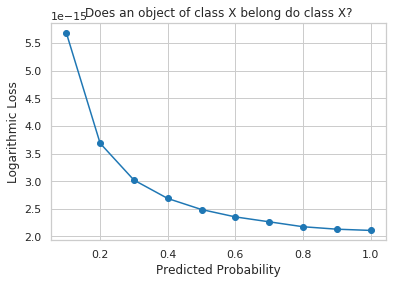

In [77]:
from sklearn.metrics import log_loss

# the correct cluster for each sample, i.e., sample 1 is in class 0
y_true = [0, 0, 1, 1,2]
# the predictions: 1st sample is 90% predicted to be in class 0
y_pred = [[.9, .1,.0], [.8, .2,.0], [.3, .7,.0], [.01, .99,.0],[.0,.0,1.0]]
print(log_loss(y_true, y_pred)) 

# perfect prediction
y_perfect = [[1.0, .0,.0], [1.0, .0,.0], [.0, 1.0,.0], [0, 1.0,.0],[.0,.0,1.0]]
print(log_loss(y_true, y_perfect)) 

x=[]
y=[]
# the for loop modifies the first prediction of an element belonging to class 0 from 0 to 1
# in other words, from a wrong to a correct prediction
for i in range(1,11):
    r2=y_perfect
    r2[0][0]=float(i/10)
    x.append(r2[0][0])
    y.append(log_loss(y_true,r2))

# plot the result
plt.xlabel("Predicted Probability")
plt.ylabel("Logarithmic Loss")
plt.title("Does an object of class X belong do class X?")
plt.plot(x,y,'o-')
#plt.savefig("test.pdf",format="pdf")

## Cross-Validation

Using an exhaustive [sample use case](https://github.com/elektrobohemian/dst4l-copenhagen/blob/master/NaiveBayes.ipynb) that uses a naive Bayes classifier to determine wheter a Rotten Tomatoes critic is positive or negative, you will see how cross-validation works in practice.